In [1]:
import numpy as np
data = np.array([0, 0, 0, 1, 1, 1]) # 想要將 0 --> -1, 1 --> 1
#np.where(data==0)
#np.where(data==0, -1, 1)


In [2]:
# 準備 X(四個特徵), y(1, -1)
# 考試 僅使用前面兩個特徵(花萼的長寬)去訓練資料
# 花萼長 花萼寬 花瓣長 花瓣寬
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np
iris = datasets.load_iris()
X = iris['data'][:100, [0,1] ]
y = np.where( iris['target'][:100]==0, -1, 1)

# ss = StandardScaler()
# X = ss.fit_transform(X)

X[:4], y[:4]

(array([[5.1, 3.5],
        [4.9, 3. ],
        [4.7, 3.2],
        [4.6, 3.1]]),
 array([-1, -1, -1, -1]))

In [3]:
class Perceptron(object):
    """Perceptron classifier.
    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.
    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta       #學習率
        self.n_iter = n_iter #所有數據要跑幾輪
        self.random_state = random_state #初始亂數種子
    # 匯入資料加上訓練
    def fit(self, X, y):
        """Fit training data.
        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.
        Returns
        -------
        self : object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []
        # 將所有的數據跑過幾輪(epochs)
        for _ in range(self.n_iter):
            errors = 0                   # 每一輪(含所有數據)一開始重置錯誤
            for xi, target in zip(X, y): # 所有數據的每一筆去跟權重進行修正
                update = self.eta * (target - self.predict(xi)) # 計算修正值
                self.w_[1:] += update * xi                      # 根據每一筆資料(X)去修正權重(W)
                self.w_[0] += update                            # 根據每一筆資料(X)去修正權重(W0)
                errors += int(update != 0.0)                    # 計算有這一輪中有幾次預測錯誤
            self.errors_.append(errors)  # 希望可以訓練一邊顯示   # 紀錄每一輪中總共有多少錯誤 
            ##################################################### early stopping
            if len(self.errors_)>=2:
                if sum(self.errors_[-2:])==0:                    
                    print('第 {} 次訓練有 {} 錯誤'.format(_, errors) )
                    print('訓練中斷因為連續兩次都是0')
                    break
            #####################################################
            print('第 {} 次訓練有 {} 錯誤'.format(_, errors) )
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0] # 就是 W.T * X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1) # 根據 W.T * X 判斷哪一個種類 y(hat)

In [11]:
model = Perceptron(n_iter=50000) # 初始類別
print(dir(model))    # 檢視類別提供方法

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'eta', 'fit', 'n_iter', 'net_input', 'predict', 'random_state']


In [12]:
model.fit(X, y)     # 呼叫類別的.fit(方法就是匯入資料 加上訓練)
                    # 改了類別之後，這裡就會顯示每一次訓練的錯誤個數 

第 0 次訓練有 1 錯誤
第 1 次訓練有 3 錯誤
第 2 次訓練有 2 錯誤
第 3 次訓練有 2 錯誤
第 4 次訓練有 3 錯誤
第 5 次訓練有 2 錯誤
第 6 次訓練有 2 錯誤
第 7 次訓練有 2 錯誤
第 8 次訓練有 3 錯誤
第 9 次訓練有 2 錯誤
第 10 次訓練有 2 錯誤
第 11 次訓練有 2 錯誤
第 12 次訓練有 3 錯誤
第 13 次訓練有 2 錯誤
第 14 次訓練有 2 錯誤
第 15 次訓練有 3 錯誤
第 16 次訓練有 2 錯誤
第 17 次訓練有 2 錯誤
第 18 次訓練有 2 錯誤
第 19 次訓練有 3 錯誤
第 20 次訓練有 2 錯誤
第 21 次訓練有 2 錯誤
第 22 次訓練有 2 錯誤
第 23 次訓練有 2 錯誤
第 24 次訓練有 3 錯誤
第 25 次訓練有 2 錯誤
第 26 次訓練有 2 錯誤
第 27 次訓練有 2 錯誤
第 28 次訓練有 3 錯誤
第 29 次訓練有 2 錯誤
第 30 次訓練有 2 錯誤
第 31 次訓練有 2 錯誤
第 32 次訓練有 3 錯誤
第 33 次訓練有 2 錯誤
第 34 次訓練有 2 錯誤
第 35 次訓練有 3 錯誤
第 36 次訓練有 2 錯誤
第 37 次訓練有 2 錯誤
第 38 次訓練有 2 錯誤
第 39 次訓練有 3 錯誤
第 40 次訓練有 2 錯誤
第 41 次訓練有 2 錯誤
第 42 次訓練有 3 錯誤
第 43 次訓練有 2 錯誤
第 44 次訓練有 2 錯誤
第 45 次訓練有 2 錯誤
第 46 次訓練有 3 錯誤
第 47 次訓練有 2 錯誤
第 48 次訓練有 2 錯誤
第 49 次訓練有 2 錯誤
第 50 次訓練有 3 錯誤
第 51 次訓練有 2 錯誤
第 52 次訓練有 2 錯誤
第 53 次訓練有 2 錯誤
第 54 次訓練有 3 錯誤
第 55 次訓練有 2 錯誤
第 56 次訓練有 2 錯誤
第 57 次訓練有 3 錯誤
第 58 次訓練有 2 錯誤
第 59 次訓練有 2 錯誤
第 60 次訓練有 3 錯誤
第 61 次訓練有 2 錯誤
第 62 次訓練有 2 錯誤
第 63 次訓練有 3 錯誤
第 64 次訓練有 2 錯誤
第 65 次訓練有 2 錯誤
第 66 次訓練有 3 錯誤
第 67 

第 576 次訓練有 2 錯誤
第 577 次訓練有 2 錯誤
第 578 次訓練有 2 錯誤
第 579 次訓練有 2 錯誤
第 580 次訓練有 2 錯誤
第 581 次訓練有 2 錯誤
第 582 次訓練有 2 錯誤
第 583 次訓練有 3 錯誤
第 584 次訓練有 2 錯誤
第 585 次訓練有 2 錯誤
第 586 次訓練有 2 錯誤
第 587 次訓練有 2 錯誤
第 588 次訓練有 2 錯誤
第 589 次訓練有 2 錯誤
第 590 次訓練有 2 錯誤
第 591 次訓練有 2 錯誤
第 592 次訓練有 2 錯誤
第 593 次訓練有 3 錯誤
第 594 次訓練有 2 錯誤
第 595 次訓練有 2 錯誤
第 596 次訓練有 2 錯誤
第 597 次訓練有 2 錯誤
第 598 次訓練有 2 錯誤
第 599 次訓練有 2 錯誤
第 600 次訓練有 2 錯誤
第 601 次訓練有 2 錯誤
第 602 次訓練有 3 錯誤
第 603 次訓練有 2 錯誤
第 604 次訓練有 2 錯誤
第 605 次訓練有 2 錯誤
第 606 次訓練有 2 錯誤
第 607 次訓練有 2 錯誤
第 608 次訓練有 2 錯誤
第 609 次訓練有 2 錯誤
第 610 次訓練有 2 錯誤
第 611 次訓練有 2 錯誤
第 612 次訓練有 3 錯誤
第 613 次訓練有 2 錯誤
第 614 次訓練有 2 錯誤
第 615 次訓練有 2 錯誤
第 616 次訓練有 2 錯誤
第 617 次訓練有 2 錯誤
第 618 次訓練有 2 錯誤
第 619 次訓練有 2 錯誤
第 620 次訓練有 2 錯誤
第 621 次訓練有 3 錯誤
第 622 次訓練有 2 錯誤
第 623 次訓練有 2 錯誤
第 624 次訓練有 2 錯誤
第 625 次訓練有 2 錯誤
第 626 次訓練有 2 錯誤
第 627 次訓練有 2 錯誤
第 628 次訓練有 2 錯誤
第 629 次訓練有 2 錯誤
第 630 次訓練有 2 錯誤
第 631 次訓練有 3 錯誤
第 632 次訓練有 2 錯誤
第 633 次訓練有 2 錯誤
第 634 次訓練有 2 錯誤
第 635 次訓練有 2 錯誤
第 636 次訓練有 2 錯誤
第 637 次訓練有 2 錯誤
第 638 次訓

In [13]:
# 檢視權重
model.w_

array([-2.50375655,  1.58388244, -2.01128172])

In [14]:
# 檢視每一EPOCHS的訓練有幾筆數據預測錯誤
len(model.errors_)

716

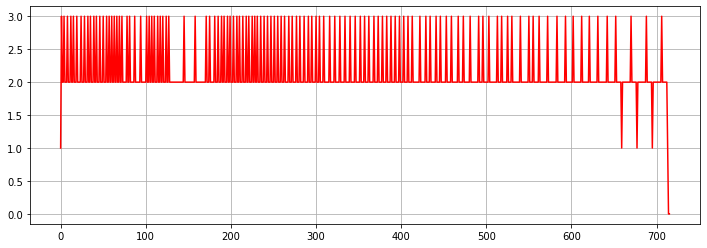

In [15]:
# 針對每一輪的所有一百筆數據預測錯誤筆數畫出來
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.plot(model.errors_, color='red')
plt.grid()
plt.show()